# Import necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
country_data = pd.read_csv("country_wise_latest.csv")
country_data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


# Explore the country-wise data.
* Find if there are any missing values.
* Find the different data types present in the data.

In [3]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [4]:
country_data.nunique()

Country/Region            187
Confirmed                 184
Deaths                    150
Recovered                 178
Active                    173
New cases                 122
New deaths                 38
New recovered             103
Deaths / 100 Cases        145
Recovered / 100 Cases     177
Deaths / 100 Recovered    155
Confirmed last week       183
1 week change             162
1 week % increase         169
WHO Region                  6
dtype: int64

In [5]:
# since "WHO Region" has few unique values of type object, i will map each value to an integer.
country_data['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [6]:
who_region_dict = {
    'Africa': 1,
    'Americas': 2,
    'Eastern Mediterranean': 3,
    'Europe': 4,
    'South-East Asia': 5,
    'Western Pacific': 6,
}

country_data['WHO Region'] = country_data['WHO Region'].astype("str")
country_data['WHO Region'] = country_data['WHO Region'].map(who_region_dict)

# Visualizing the data
* Number of deaths in each WHO Region
* Number of active cases in each WHO Region
* Number of recoveries in each WHO Region
* Number of recoveries in a particular region

Text(0.5, 1.0, 'Number of Deaths in each Region')

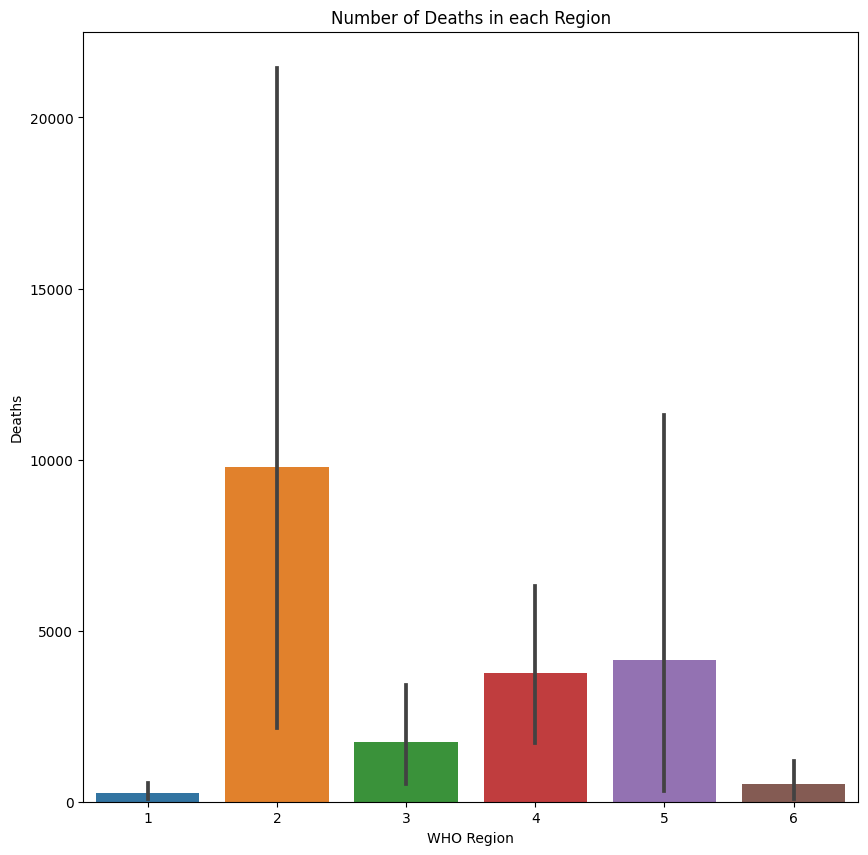

In [7]:
plt.figure(figsize=(10, 10))
sns.barplot(x=country_data['WHO Region'], y=country_data['Deaths'])
plt.title("Number of Deaths in each Region")

Text(0.5, 1.0, 'Number of Active cases in each Region')

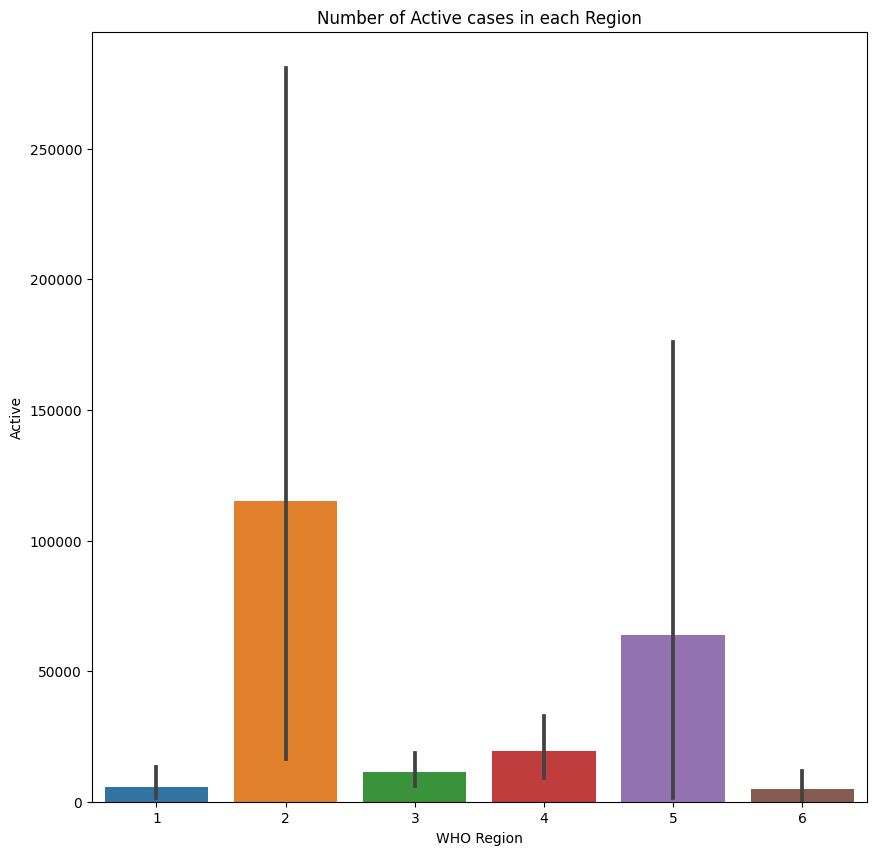

In [8]:
plt.figure(figsize=(10, 10))
sns.barplot(x=country_data['WHO Region'], y=country_data['Active'])
plt.title("Number of Active cases in each Region")

Text(0.5, 1.0, 'Number of Recoveries in each Region')

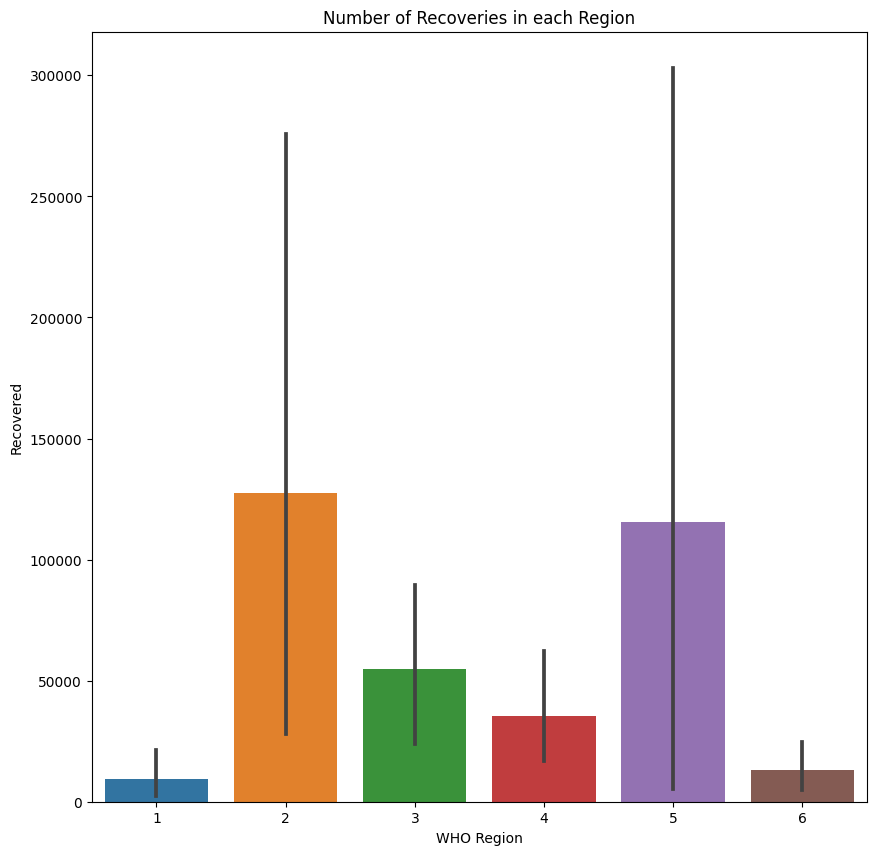

In [9]:
plt.figure(figsize=(10, 10))
sns.barplot(x=country_data['WHO Region'], y=country_data['Recovered'])
plt.title("Number of Recoveries in each Region")

In [10]:
grouped_country_data = country_data.groupby('WHO Region')['Deaths', 'Active', 'Recovered'].sum().reset_index()
grouped_country_data

C:\Users\edonk\AppData\Local\Temp\ipykernel_2080\2623095237.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_country_data = country_data.groupby('WHO Region')['Deaths', 'Active', 'Recovered'].sum().reset_index()


,WHO Region,Deaths,Active,Recovered
0,1,12223,270339,440645
1,2,342732,4027938,4468616
2,3,38339,251005,1201400
3,4,211144,1094656,1993723
4,5,41349,637015,1156933
5,6,8249,77409,206770


In [11]:
westernpacific_group_data = country_data.loc[country_data['WHO Region'] == 6].reset_index()

westernpacific_group_data

,index,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,6
1,24,Brunei,141,3,138,0,0,0,0,2.13,97.87,2.17,141,0,0.00,6
2,30,Cambodia,226,0,147,79,1,0,4,0.00,65.04,0.00,171,55,32.16,6
3,36,China,86783,4656,78869,3258,213,4,7,5.37,90.88,5.90,85622,1161,1.36,6
4,59,Fiji,27,0,18,9,0,0,0,0.00,66.67,0.00,27,0,0.00,6
5,87,Japan,31142,998,21970,8174,594,0,364,3.20,70.55,4.54,25706,5436,21.15,6
6,94,Laos,20,0,19,1,0,0,0,0.00,95.00,0.00,19,1,5.26,6
7,105,Malaysia,8904,124,8601,179,7,0,1,1.39,96.60,1.44,8800,104,1.18,6
8,114,Mongolia,289,0,222,67,1,0,4,0.00,76.82,0.00,287,2,0.70,6
9,121,New Zealand,1557,22,1514,21,1,0,1,1.41,97.24,1.45,1555,2,0.13,6


Text(0.5, 1.0, 'Number of recoveries in the Western Pacific')

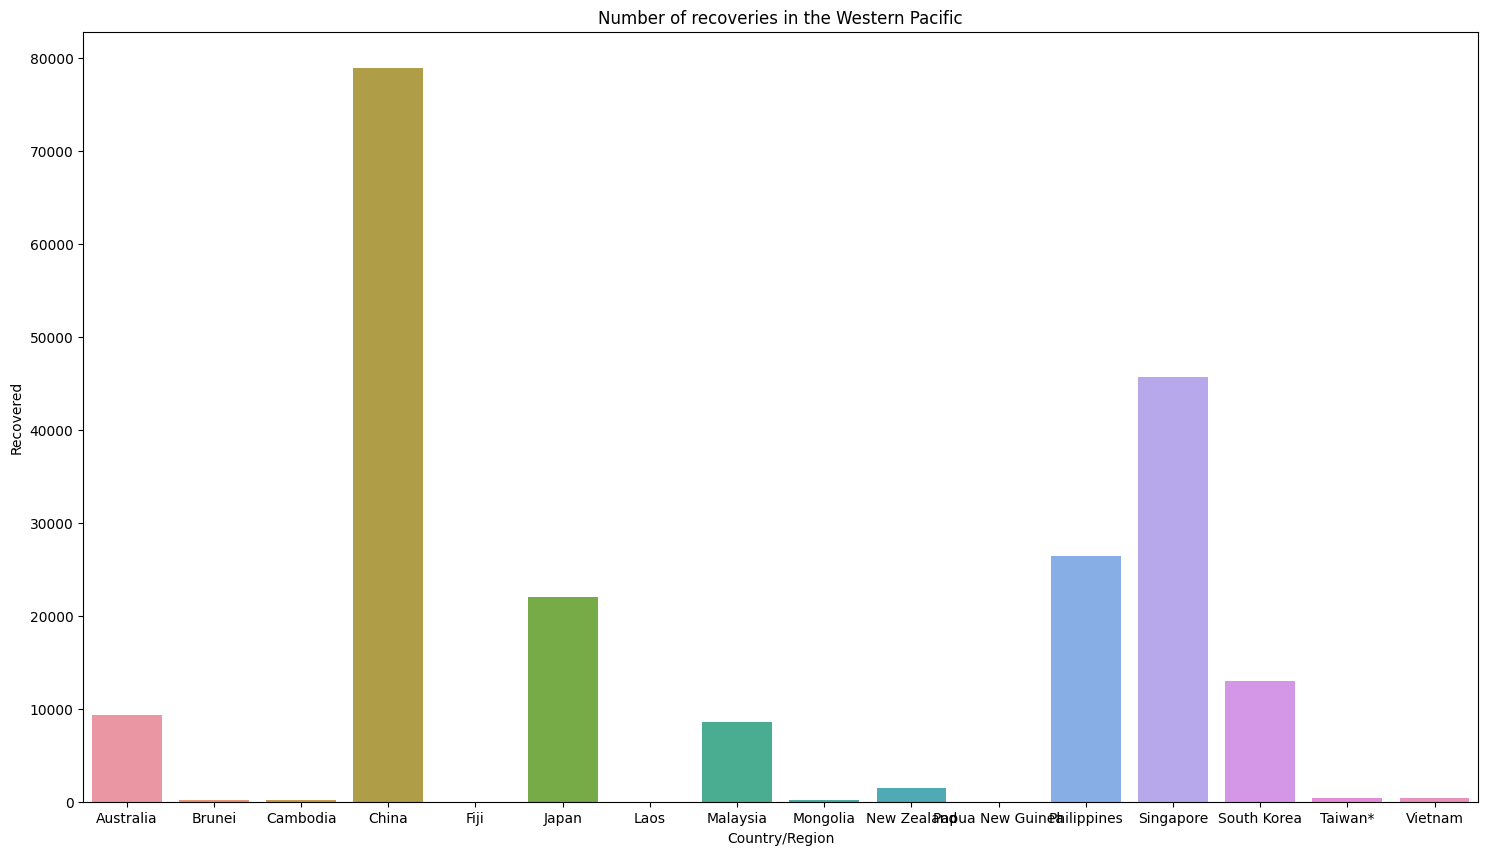

In [12]:
plt.figure(figsize=(18, 10))
sns.barplot(x=westernpacific_group_data['Country/Region'], y=westernpacific_group_data['Recovered'])
plt.title("Number of recoveries in the Western Pacific")

# Export data as an excel file

In [15]:
country_data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,3
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,4
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,1
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,4
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,3
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,1
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,3
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,1


In [19]:
country_data.to_csv('final-country-data.csv')